In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PYPL', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'BYRN', 'CIZN', 'CTSH', 'CUBE', 'EP', 'EXR', 'FCPT', 
    'FCUV', 'GBOX', 'GME', 'INTZ', 'KREF', 'LFMD', 'MCVT', 'MNMD',
    'OMQS', 'PETV', 'POWW', 'PRPH', 'RA', 'RVP', 'VIRT', 'WAVD', 'WKHS',
    'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'APT', 'BKT', 'CEF', 'CFFN', 'CZFS', 'FCAP', 'FCN', 'FNV',
    'GCBC', 'HMY', 'IEI', 'MICS', 'MIY', 'MUJ', 'NAZ', 'NLY', 'NPV',
    'NXP', 'SOBR']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

73

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-09-24', datetime.date(2022, 9, 24))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  123 of 123 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ADBE... ADYEY... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BKT... BROS... BYND... BYRN... CEF... CFFN... CHWY... CIZN... CRWD... CTSH... CUBE... CZFS... DDOG... DOCS... DOCU... DUOL... EDIT... EP... ETSY... EXR... FCAP... FCN... FCPT... FCUV... FLGT... FNV... GBOX... GCBC... GH... GME... GMED... GOOG... HMY... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MIY... MNMD... MNST... MSFT... MTCH... MUJ... NAZ... NLY... NPV... NVCR... NVDA... NXP... ODFL... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PYPL... QDEL... RA... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... RVP... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TREX... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VLD... VRTX... WAVD... WKHS... 

In [5]:
data['Date'].tail()

2512   2022-09-19
2513   2022-09-20
2514   2022-09-21
2515   2022-09-22
2516   2022-09-23
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.989498
2       0.994263
3       1.009649
4       0.995522
5       1.002652
          ...   
2512    1.006857
2513    0.988728
2514    0.982884
2515    0.991572
2516    0.982767
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.000365
2,1.002551
3,1.013883
4,1.004385
5,1.009793
...,...
2512,1.011979
2513,0.997574
2514,1.000680
2515,0.991096


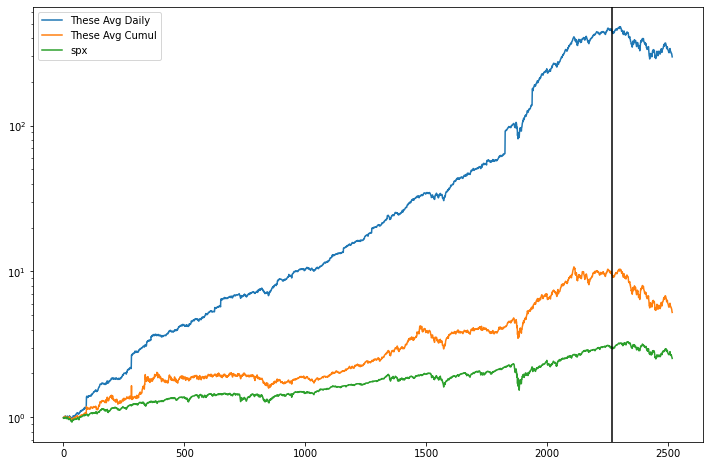

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-09-24,NaN,NaN
1,2012-09-25,0.997132,0.997132
2,2012-09-26,0.986774,0.986732
3,2012-09-27,1.001987,1.001657
4,2012-09-28,0.996502,0.991753


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-09-19,313.308620,5.657920
2513,2022-09-20,313.103937,5.557941
2514,2022-09-21,309.166168,5.506089
2515,2022-09-22,300.253849,5.321112
2516,2022-09-23,295.441703,5.238853


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

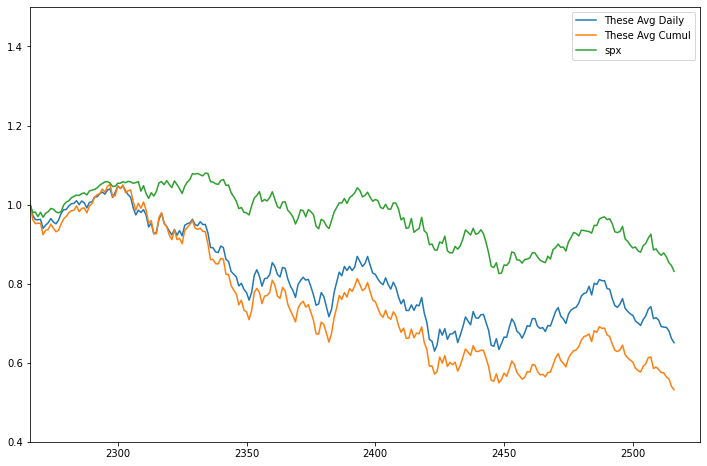

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,66.860001,66.860001,68.279999,65.209999,68.279999,4.202601,0.979203,0.970392,0.991001
2458,69.059998,69.059998,70.779999,66.320000,66.610001,4.234976,1.036781,1.032905,0.996261
2459,75.339996,75.339996,76.250000,66.190002,67.565002,4.322011,1.115074,1.090935,0.978352
2460,73.730003,73.730003,75.790001,71.669998,74.269997,4.300410,0.992729,0.978630,0.985798
2461,76.500000,76.500000,77.309998,73.900002,75.000000,4.337291,1.020000,1.037569,1.017225


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,66.860001,66.860001,68.279999,65.209999
2458,69.059998,69.059998,70.779999,66.320000
2459,75.339996,75.339996,76.250000,66.190002
2460,73.730003,73.730003,75.790001,71.669998
2461,76.500000,76.500000,77.309998,73.900002


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,66.860001,66.860001,68.279999,65.209999,70.779999,66.320000,1.058630,0.991923
2458,69.059998,69.059998,70.779999,66.320000,76.250000,66.190002,1.104112,0.958442
2459,75.339996,75.339996,76.250000,66.190002,75.790001,71.669998,1.005973,0.951288
2460,73.730003,73.730003,75.790001,71.669998,77.309998,73.900002,1.048555,1.002306
2461,76.500000,76.500000,77.309998,73.900002,79.540001,74.500000,1.039739,0.973856


0.05    0.972511
Name: HighMult, dtype: float64


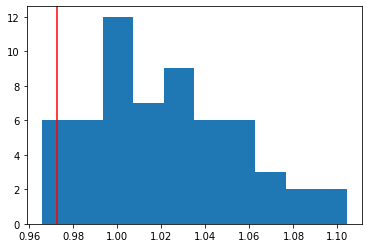

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


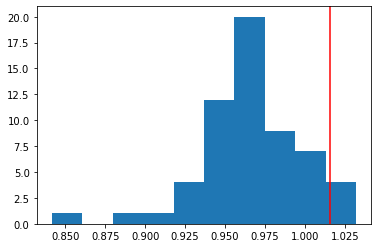

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9725107768702285)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0060613400209928, 0.993143775570025)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,66.860001,66.860001,68.279999,65.209999,70.779999,66.320000,1.058630,0.991923,0
2458,69.059998,69.059998,70.779999,66.320000,76.250000,66.190002,1.104112,0.958442,1
2459,75.339996,75.339996,76.250000,66.190002,75.790001,71.669998,1.005973,0.951288,1
2460,73.730003,73.730003,75.790001,71.669998,77.309998,73.900002,1.048555,1.002306,1
2461,76.500000,76.500000,77.309998,73.900002,79.540001,74.500000,1.039739,0.973856,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0104661326490205,
 0.9817230380628447,
 1.0184241011264155,
 0.9714539656511285)

In [27]:
get_hilo_mults(aapl)

(1.0073823300676958, 0.9975359499157594, 1.0044421058449373, 0.99192828679088)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.007382,0.997536,1.004442,0.991928
1,ABMD,1.002315,0.991443,1.002515,0.991554
2,ABNB,1.016759,0.986557,1.007559,0.995469
3,ABST,1.004608,0.995556,1.002605,0.991087
4,ADBE,1.006579,0.993110,1.010772,0.968931


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,150.429993,AAPL
ABMD,245.529999,ABMD
ABNB,101.75,ABNB
ABST,10.69,ABST
ADBE,284.559998,ADBE
...,...,...
ZM,74.449997,ZM
ZYXI,8.39,ZYXI
^GSPC,3693.22998,^GSPC
^IXIC,10867.925781,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.007382,0.997536,1.004442,0.991928,150.429993
1,ABMD,1.002315,0.991443,1.002515,0.991554,245.529999
2,ABNB,1.016759,0.986557,1.007559,0.995469,101.75
3,ABST,1.004608,0.995556,1.002605,0.991087,10.69
4,ADBE,1.006579,0.993110,1.010772,0.968931,284.559998


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv